In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  datetime import datetime
import os
import nltk
from textblob import TextBlob
import networkx as nx
%matplotlib inline

from IPython.display import display  
from ipywidgets import FloatProgress  
import time

import pprint as pp

In [8]:
email_tmp = "C:/Users/talha/Documents/DA/da_project/dataset2/"
email_tmp = pd.read_csv("C:/Users/talha/Documents/DA/da_project/dataset2/", usecols=[1,2])
email_tmp.head()

OSError: Initializing from file failed

In [2]:
_dataset2_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\"
email_sen_df = pd.read_pickle(_dataset2_dir+"email_sen_df")
email_sen_df.head()

,date,user,pc,to,cc,bcc,from,size,attachments,content,polarity,subjectivity
id,,,,,,,,,,,,
{R3I7-S4TX96FG-8219JWFF},2010-01-02 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...,0.130000,0.422500
{R0R9-E4GL59IK-2907OSWJ},2010-01-02 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...,0.150000,0.375000
{G2B2-A8XY58CP-2847ZJZL},2010-01-02 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...,-0.191667,0.481250
{A3A9-F4TH89AA-8318GFGK},2010-01-02 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...,0.021875,0.525240
{E8B7-C8FZ88UF-2946RUQQ},2010-01-02 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...,0.160494,0.389506


#### Working with only 100 rows for now

In [4]:
email_sen_df = email_sen_df.head(100)

In [3]:
# test = pd.DataFrame(email_sen_df.to.str.split(";").tolist())

In [37]:
test_email_df = email_sen_df.head(100)[['user', 'to', 'cc', 'bcc', 'from']]
# print(test_email_df.head())
print (test_email_df.shape)
print (test_email_df.columns)

# Create graph
GA = nx.from_pandas_dataframe(test_email_df, source="from", target="to")
print (nx.info(GA))

(100, 5)
Index(['user', 'to', 'cc', 'bcc', 'from'], dtype='object')
Name: 
Type: Graph
Number of nodes: 133
Number of edges: 98
Average degree:   1.4737


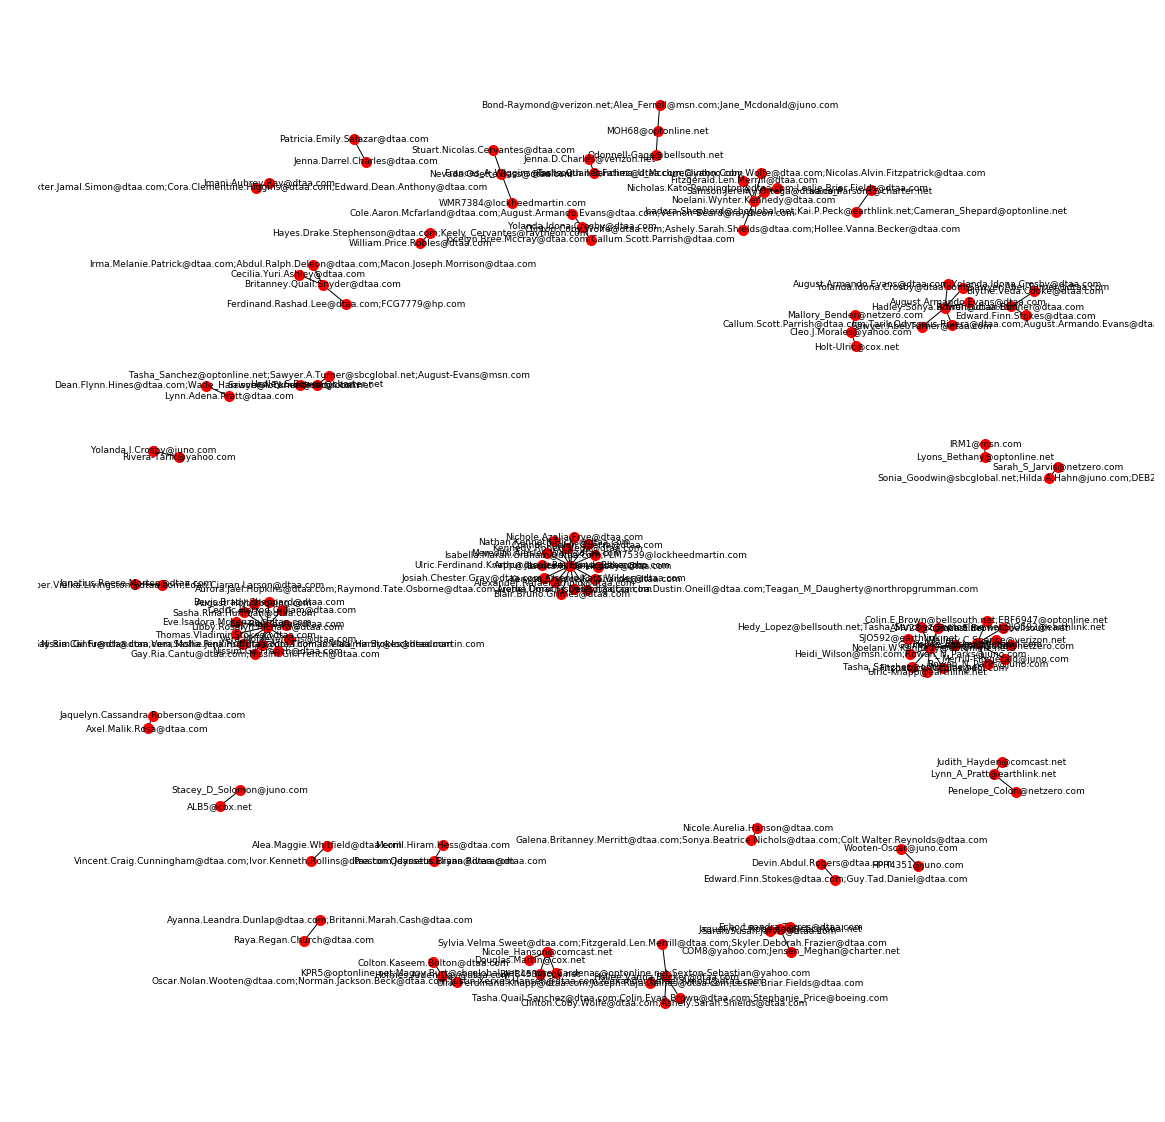

In [39]:
plt.figure(1,figsize=(20, 20)) 
plt.axis('off')

# layout = nx.circular_layout(GA)
# nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx(GA, with_labels=True, font_size=9, node_size=100)

In [8]:
len(sorted(nx.connected_components(GA), key = len, reverse=True))

25

In [3]:
from_domains = email_sen_df['from'].apply(lambda x : x.split("@")[1])

In [6]:
print("\n".join(from_domains.unique()))

dtaa.com
optonline.net
earthlink.net
hotmail.com
charter.net
verizon.net
juno.com
netzero.com
comcast.net
sbcglobal.net
msn.com
yahoo.com
cox.net
aol.com
bellsouth.net
gmail.com


In [1]:
emailDict = dict()
froms = email_sen_df["from"].unique()
for email in froms:
    emailDict[email] = []
len(emailDict)

NameError: name 'email_sen_df' is not defined

In [5]:
# fill up the dict

froms = email_sen_df.as_matrix(columns=["from"])
users = email_sen_df.as_matrix(columns=["user"])
#froms = emails["from"].tolist()
#users = emails["user"].tolist()

fp = FloatProgress(min=0,max=len(emailDict))  
display(fp)

allEmails = np.unique(froms)
for i,email in enumerate(allEmails):
    if i%200 == 0:
        print ("Iteration, " ,i)
    fp.value += 1
    rows = np.where(froms == email)
    #if(fp.value < 10):
        #print(froms[rows])
    allUSers = np.unique(users[rows])
    emailDict[email] = allUSers

A Jupyter Widget

Iteration,  0
Iteration,  200
Iteration,  400
Iteration,  600
Iteration,  800
Iteration,  1000
Iteration,  1200
Iteration,  1400
Iteration,  1600
Iteration,  1800
Iteration,  2000
Iteration,  2200
Iteration,  2400
Iteration,  2600


In [19]:
unique_users = email_sen_df.user.unique()

In [24]:
usersDict = dict()
froms = email_sen_df["user"].unique()
for u in froms:
    usersDict[u] = []
# len(usersDict)


users = email_sen_df.as_matrix(columns=["user"])
to = email_sen_df.as_matrix(columns=["to"])

_iter = 0
for user in unique_users:
    _iter+=1
    if _iter%100 == 0:
        print (_iter)
    rows = users == user
    unique_tos = np.unique(to[rows])
    for unique_to in unique_tos:
        split_unique_to = unique_to.split(";")
        for sp in split_unique_to:
            try:
                usersDict[user].append(emailDict[sp][0])
            except:
                usersDict[user].append(sp)    

100
200
300
400
500
600
700
800
900
1000


In [32]:
print(len(usersDict.keys()))

1000


In [ ]:
# graph_df = pd.DataFrame(columns=['from', 'to'])

# i = 0
# _iter = 0
# for user, in usersDict.keys():
#     if _iter%1 == 0:
#         print (_iter)
#     tos = usersDict[user]
#     for to in tos:
#         graph_df.loc[i] = [user,to]
#         i+=1
#     _iter+=1

In [74]:
small_email = email_sen_df.head(100)

In [4]:
from_to_emails = email_sen_df[['from', 'to']]

lst_col = 'to'
x = from_to_emails.assign(**{lst_col:from_to_emails[lst_col].str.split(';')})
print(x.shape)

from_to = pd.DataFrame({
        col:np.repeat(x[col].values, x[lst_col].str.len())
        for col in x.columns.difference([lst_col])
    }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]
print(from_to.shape)

(2629979, 2)
(4312375, 2)


In [25]:
from_cc_emails = email_sen_df[['from', 'cc']]
print (from_cc_emails.shape)
from_cc_emails = from_cc_emails[from_cc_emails['cc'].notnull()]
print (from_cc_emails.shape)
lst_col = 'cc'
x = from_cc_emails.assign(**{lst_col: from_cc_emails[lst_col].str.split(';')})
print(x.shape)

from_cc = pd.DataFrame({
        col:np.repeat(x[col].values, x[lst_col].str.len())
        for col in x.columns.difference([lst_col])
    }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]
from_cc.drop_duplicates(inplace=True)
print(from_cc.shape)

(2629979, 2)
(1012925, 2)
(1012925, 2)
(160614, 2)


In [6]:
from_bcc_emails = email_sen_df[['from', 'bcc']]
from_bcc_emails = from_bcc_emails[from_bcc_emails['bcc'].notnull()]
lst_col = 'bcc'

x = from_bcc_emails.assign(**{lst_col: from_bcc_emails[lst_col].str.split(';')})
x
print(x.shape)

from_bcc = pd.DataFrame({
        col:np.repeat(x[col].values, x[lst_col].str.len())
        for col in x.columns.difference([lst_col])
    }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]
print(from_bcc.shape)

(417002, 2)
(440216, 2)


In [7]:
GA = nx.from_pandas_dataframe(from_to, source="from", target="to")
print (nx.info(GA))

Name: 
Type: Graph
Number of nodes: 10831
Number of edges: 404606
Average degree:  74.7126


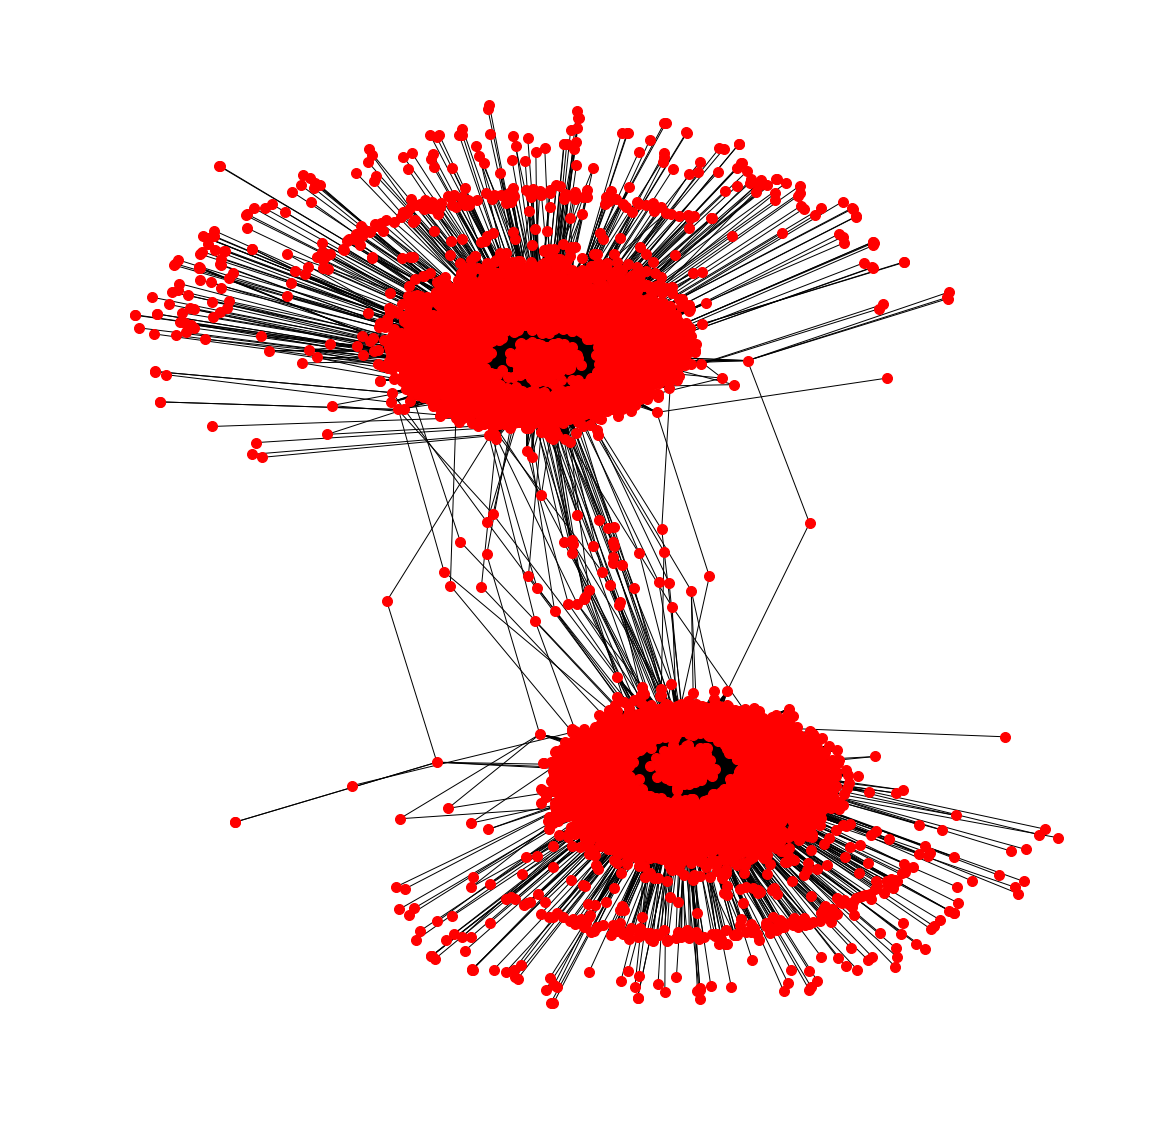

In [108]:
plt.figure(1,figsize=(20, 20)) 
plt.axis('off')

layout = nx.circular_layout(GA)
# nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx(GA, with_labels=False, font_size=9, node_size=100)

In [8]:
fig = plt.figure(1,figsize=(100, 100)) 
plt.axis('off')

layout = nx.circular_layout(GA)
# nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx(GA, with_labels=False, font_size=9, node_size=100)
fig.savefig(_dataset2_dir+"from_to.png")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [10]:
nx.write_gpickle(GA, _dataset2_dir+"from_to_graph")

In [28]:
G_from_cc = nx.from_pandas_dataframe(from_cc, source="from", target="cc")
print (nx.info(G_from_cc))

Name: 
Type: Graph
Number of nodes: 10123
Number of edges: 139682
Average degree:  27.5970


In [29]:
fig = plt.figure(1,figsize=(100, 100)) 
plt.axis('off')

layout = nx.circular_layout(G_from_cc)
# nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx(G_from_cc, with_labels=False, font_size=9, node_size=100)
fig.savefig(_dataset2_dir+"from_cc.png")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [30]:
nx.write_gpickle(G_from_cc, _dataset2_dir+"from_cc_graph")

In [32]:
from_bcc.drop_duplicates(inplace=True)
G_from_bcc = nx.from_pandas_dataframe(from_bcc, source="from", target="bcc")
print (nx.info(G_from_bcc))
nx.write_gpickle(G_from_bcc, _dataset2_dir+"from_bcc_graph")

Name: 
Type: Graph
Number of nodes: 597
Number of edges: 623
Average degree:   2.0871


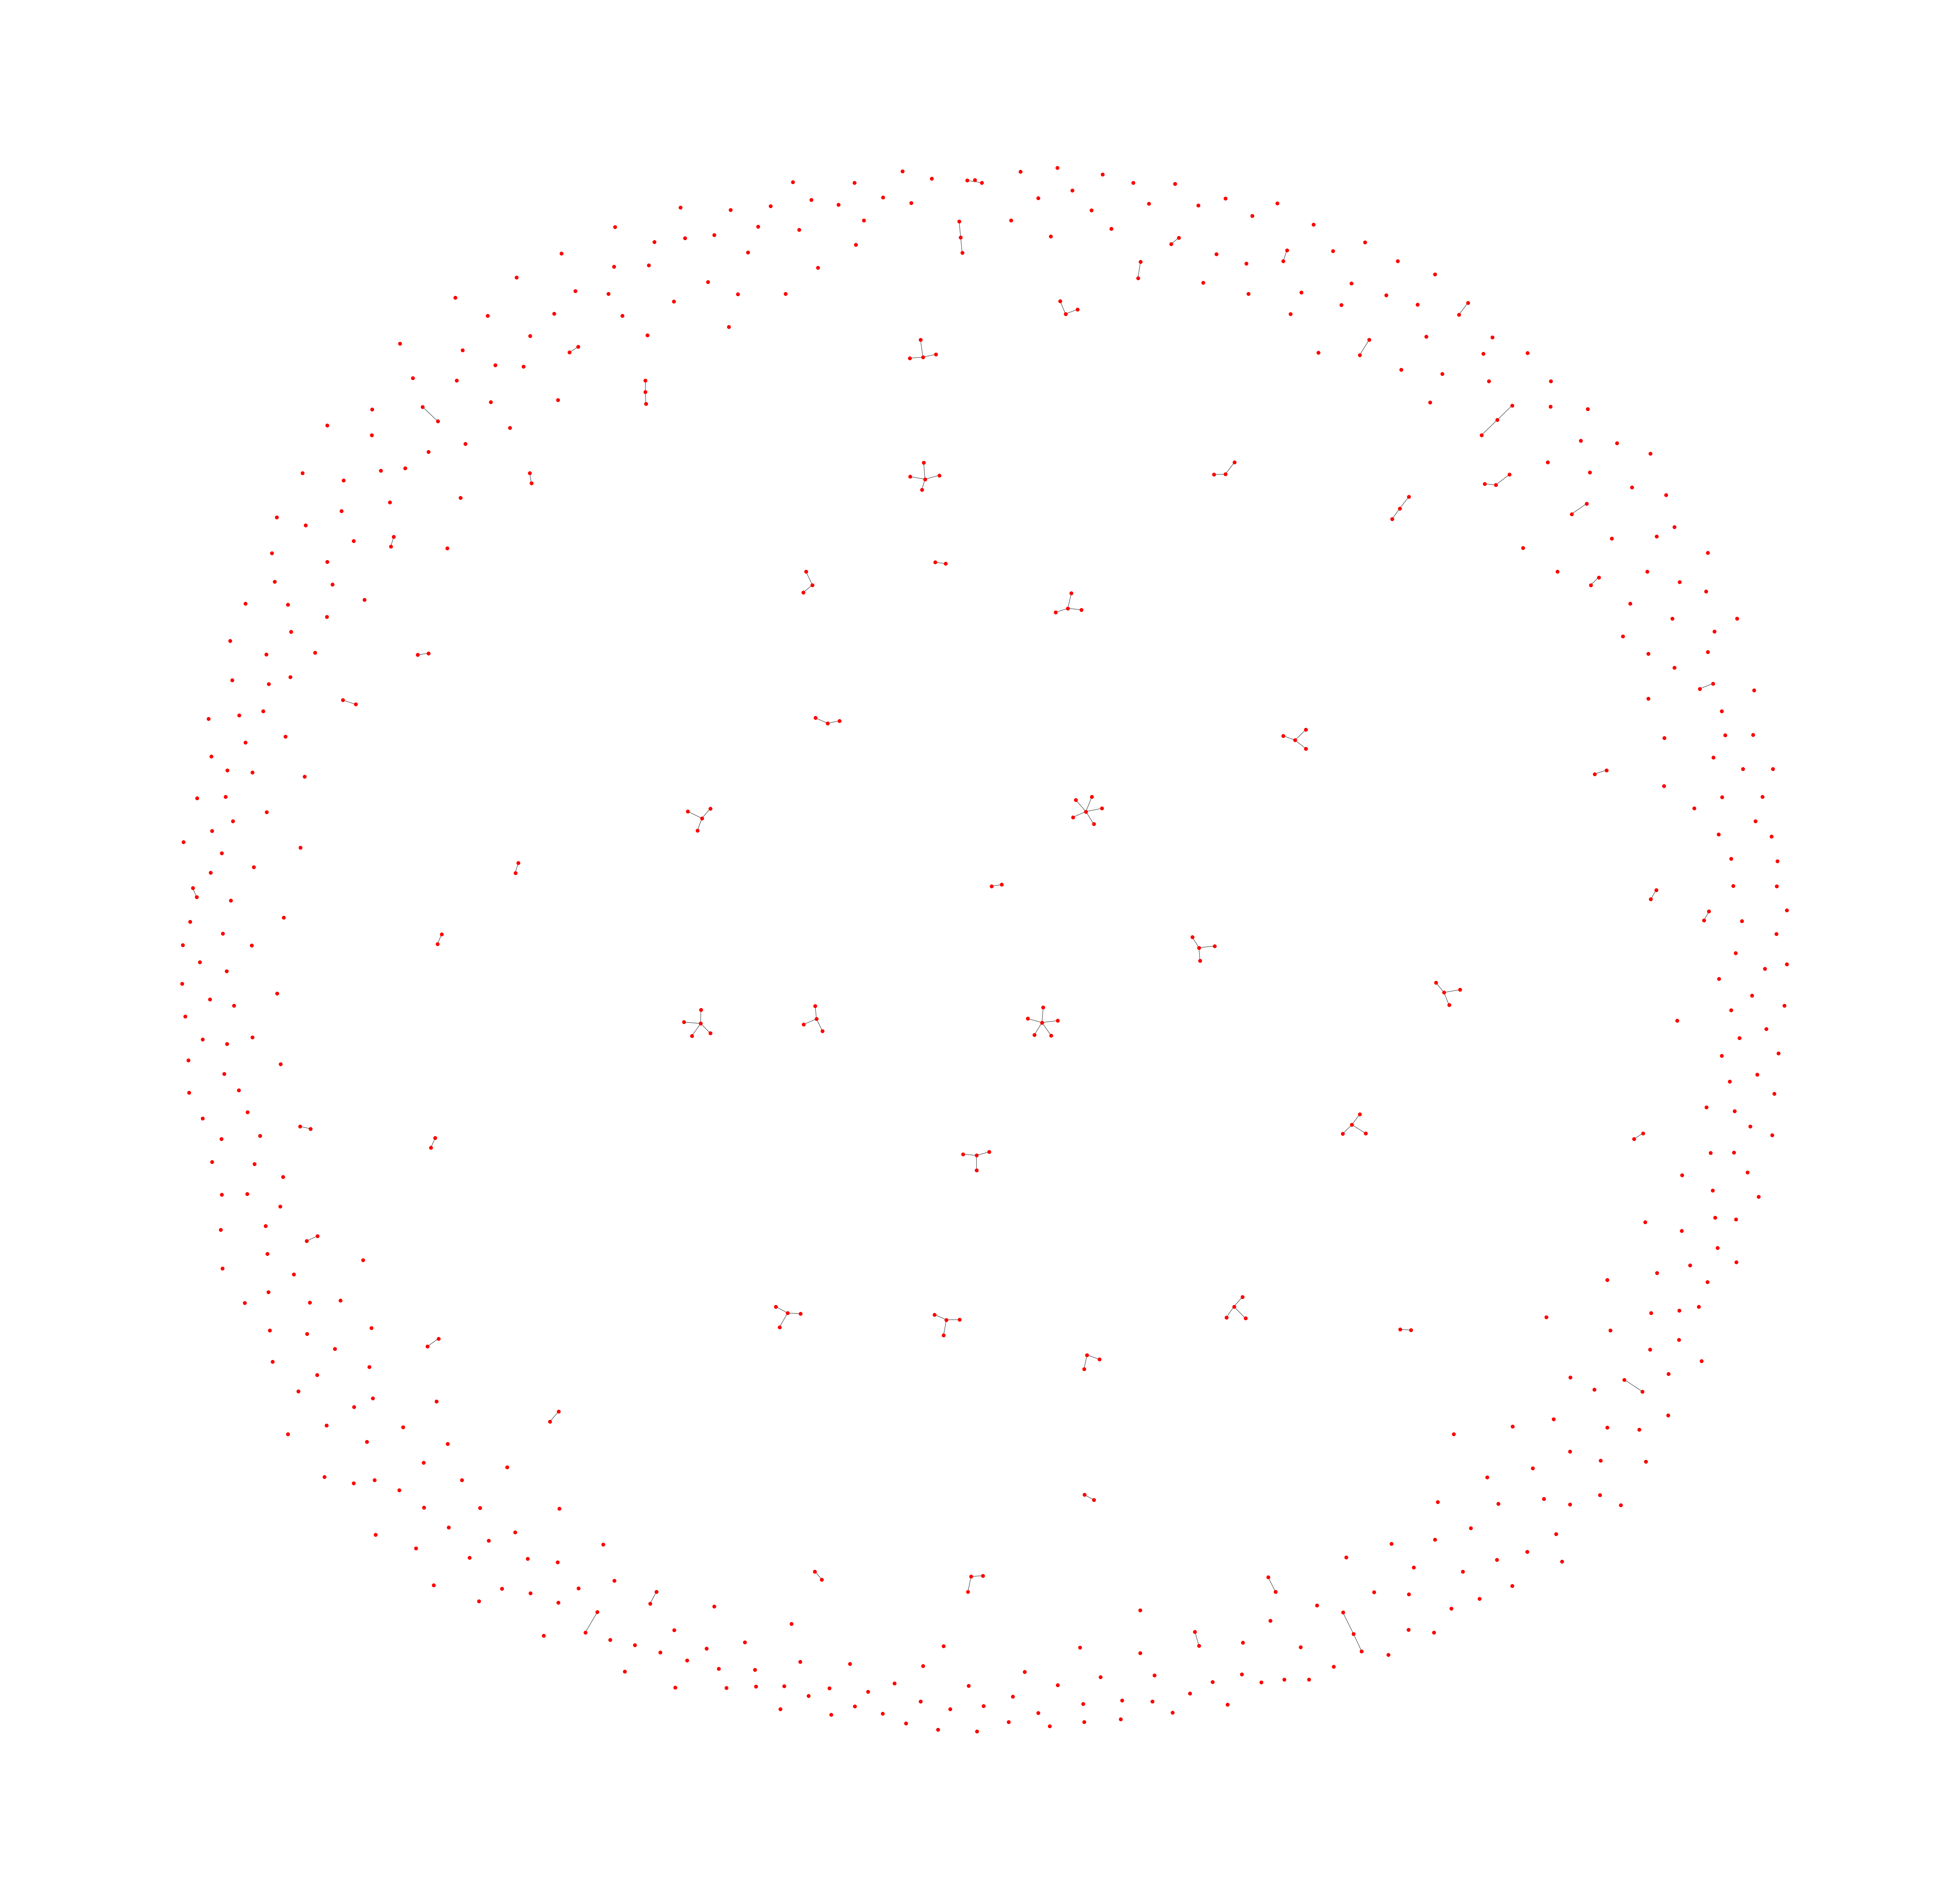

In [33]:
fig = plt.figure(1,figsize=(100, 100)) 
plt.axis('off')

# layout = nx.circular_layout(G_from_bcc)
# nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx(G_from_bcc, with_labels=False, font_size=9, node_size=100)
fig.savefig(_dataset2_dir+"from_bcc.png")

In [3]:
 per_user_spams = email_sen_df[email_sen_df['content'].str.contains("prince") & 
              email_sen_df['content'].str.contains("ahmose") & 
              email_sen_df['content'].str.contains("ankh")].groupby(['user']).size() 

In [4]:
spam_df = pd.DataFrame(per_user_spams, columns=['pus'])
spam_df.head()

,pus
user,
AAE0190,762
AAF0791,4
ABC0174,4
ABC0253,3
ABM0845,1


In [5]:
spam_df

,pus
user,
AAE0190,762
AAF0791,4
ABC0174,4
ABC0253,3
ABM0845,1
ABN0239,8
ACC0042,3
ACV0812,1
ADC0391,9


In [7]:
# per_user_prince = email_sen_df[email_sen_df['content'].str.contains("prince")].groupby(['user']).size() 
# prince_df = pd.DataFrame(per_user_prince, columns=['pu'])
# prince_df.head()

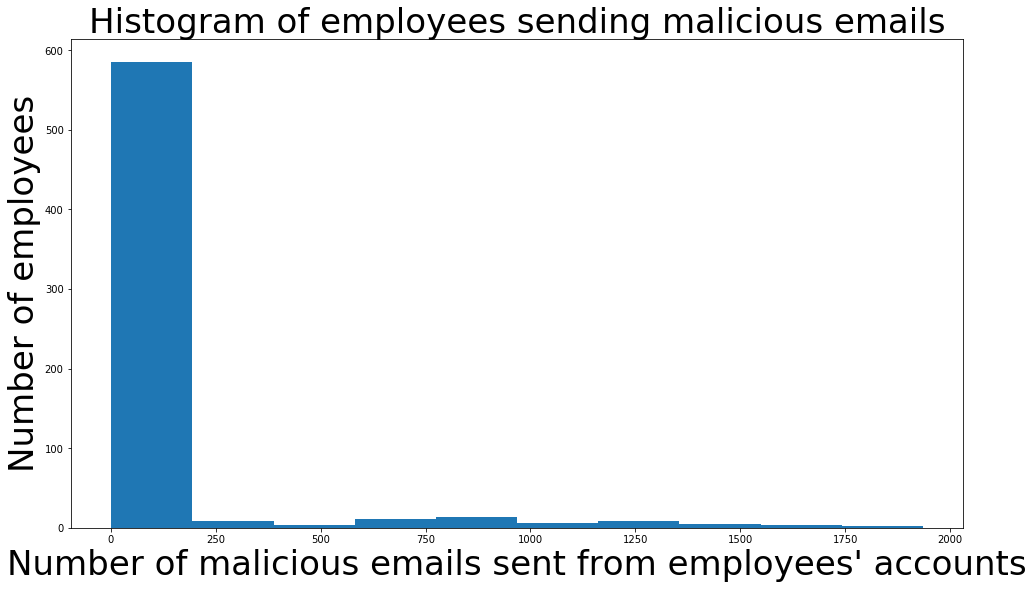

In [25]:
plt.figure(figsize = (16,9))
plt.xlabel("Number of malicious emails sent from employees' accounts", fontsize=34)
plt.ylabel("Number of employees", fontsize=34)
plt.title("Histogram of employees sending malicious emails", fontsize=34)
plt.hist(spam_df["pus"], bins=int(len(np.unique(spam_df["pus"])))//10)
plt.savefig("hist.png")

In [22]:
# prince_df = pd.DataFrame(per_user_prince, columns=['pu'])
# spam_senders = spam_df["pus"] >= 0.003
# spam_df["pus"][spam_senders]
# spam_df[spam_df["pus"]>2000].shape

In [85]:
# import seaborn as sns

# prince_df['user'] = prince_df['user'].astype("category")

# cat_cols = prince_df.select_dtypes(['category']).columns
# prince_df[cat_cols] = prince_df[cat_cols].apply(lambda x: x.cat.codes)

# sns.lmplot(data=prince_df)

In [91]:
# pd.merge(pd.merge(email_sen_df[email_sen_df['content'].str.contains("prince")], email_sen_df[email_sen_df['content'].str.contains("ahmose")], 
#          how='inner', left_index=True, right_index=True), 
#          email_sen_df[email_sen_df['content'].str.contains("ankh")], how='inner', left_index=True, right_index=True)

In [19]:
is_spam_emails = email_sen_df[email_sen_df['content'].str.contains("ankh") & email_sen_df['content'].str.contains("prince") &
            email_sen_df['content'].str.contains("ahmose")]

In [20]:
is_spam_emails['date'] = pd.to_datetime(is_spam_emails['date'])

C:\Users\talha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


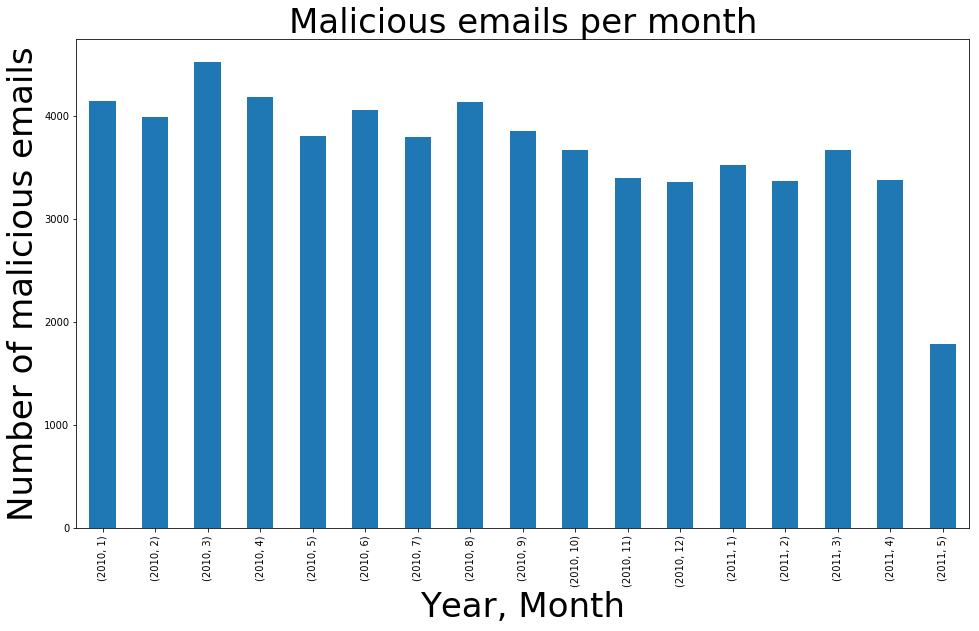

In [27]:
fig = plt.figure(figsize=(16,9))
plt.xlabel("Year, Month", fontsize=34)
plt.ylabel("Number of malicious emails", fontsize=34)
plt.title("Malicious emails per month", fontsize=34)
is_spam_emails.groupby([is_spam_emails["date"].dt.year, is_spam_emails["date"].dt.month]).size().plot(kind="bar")
plt.xlabel("Year, Month", fontsize=34)
plt.savefig("mal_per_month.png")

In [30]:
emp_df = pd.read_pickle('emp_info_last_access')
emp_df

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love@dtaa.com,ComputerProgrammer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,40,39,36,19,40,615,346,2011-05-16 18:00:00,2011-06-01,0
Christine Reagan Deleon,CRD0624,Christine.Reagan.Deleon@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Winter Veda Burks,3,1,26,22,17,39,32,50,50,2010-03-05 16:58:00,2010-03-01,0
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Caldwell@dtaa.com,SoftwareEngineer,1,2 - ResearchAndEngineering,2 - SoftwareManagement,3 - Software,Stephanie Briar Harrington,18,0,22,16,23,40,33,615,346,2011-05-16 17:47:00,2011-06-01,0
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.Dejesus@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandora England,18,0,40,48,36,14,37,346,346,2011-05-16 18:29:00,2011-06-01,0
Micah Abdul Rojas,MAR0955,Micah.Abdul.Rojas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,15,1,36,44,23,44,25,302,302,2011-03-04 16:17:00,2011-03-01,0
Gail Rhiannon Mcconnell,GRM0868,Gail.Rhiannon.Mcconnell@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,5 - RegionalSales,Hashim Damon Dudley,18,0,21,25,20,13,28,346,346,2011-05-16 17:39:00,2011-06-01,0
April Alika Levy,AAL0706,April.Alika.Levy@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,4 - AssemblyDept,Alan Benjamin Holder,18,0,37,14,28,13,25,346,346,2011-05-16 16:59:00,2011-06-01,0
Rama Vielka Clayton,RVC0232,Rama.Vielka.Clayton@dtaa.com,Mathematician,1,2 - ResearchAndEngineering,1 - Research,1 - Lab,Jackson Linus Wilkerson,18,0,34,20,47,38,25,346,346,2011-05-16 19:14:00,2011-06-01,0
Tasha Casey Dalton,TCD0009,Tasha.Casey.Dalton@dtaa.com,AdministrativeAssistant,1,1 - Adminstration,NaN,NaN,Halla Cathleen Simmons,18,0,44,28,44,38,23,346,346,2011-05-16 17:35:00,2011-06-01,0


In [31]:
spam_affected_employees = pd.DataFrame(is_spam_emails.groupby( ["user"] ).size()).reset_index()

In [32]:
emp_with_spams_sent = pd.merge(emp_df, spam_affected_employees, how='inner', left_on='user_id', right_on='user')

In [33]:
emp_with_spams_sent.groupby('role').size().count()

41

In [139]:
emp_with_spams_sent.groupby('left').size()

left
0    565
1     82
dtype: int64

In [140]:
emp_df.groupby(['functional_unit']).size()

functional_unit
1 - Adminstration              97
2 - ResearchAndEngineering    333
3 - Manufacturing             216
4 - Finance                    14
5 - SalesAndMarketing         320
6 - PurchasingAndContracts     18
dtype: int64

In [142]:
emp_with_spams_sent.groupby('functional_unit').size()

functional_unit
1 - Adminstration              85
2 - ResearchAndEngineering    260
3 - Manufacturing              57
4 - Finance                    12
5 - SalesAndMarketing         213
6 - PurchasingAndContracts     18
dtype: int64

In [144]:
emp_df.groupby(['department']).size().count()

22

In [146]:
emp_with_spams_sent.groupby('department').size().count()

22

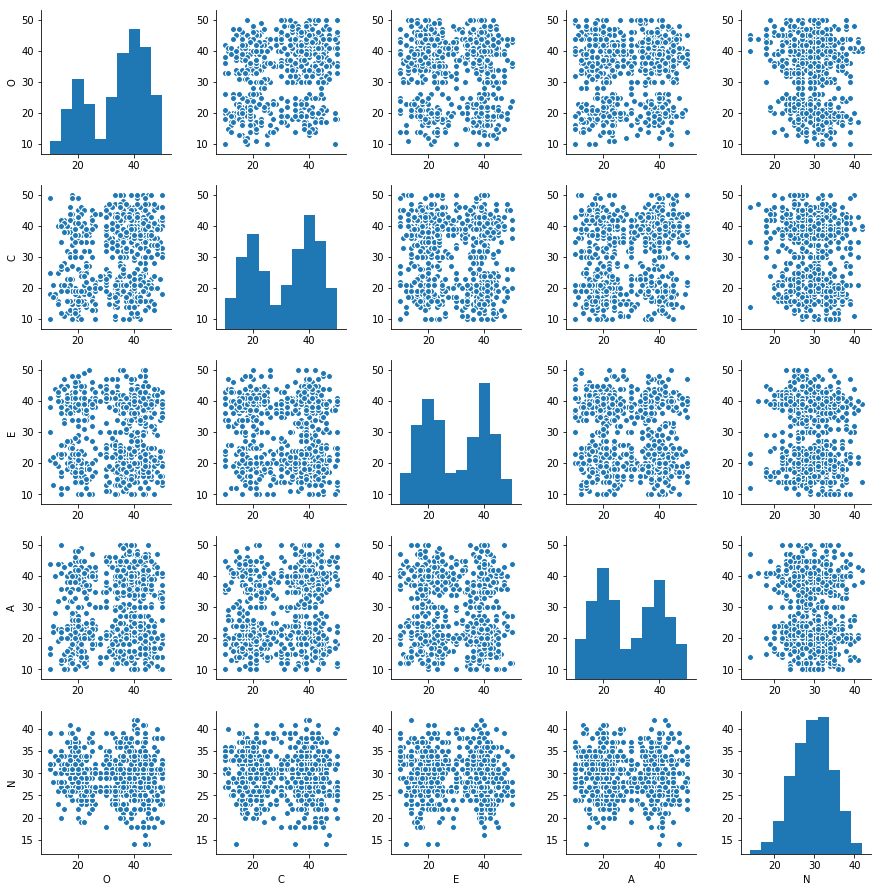

In [147]:
sns.pairplot(emp_with_spams_sent, x_vars=['O','C','E','A','N'], y_vars=['O','C','E','A','N']) 

### Ocean score distribution of supervisors of all the employees

(67, 20)


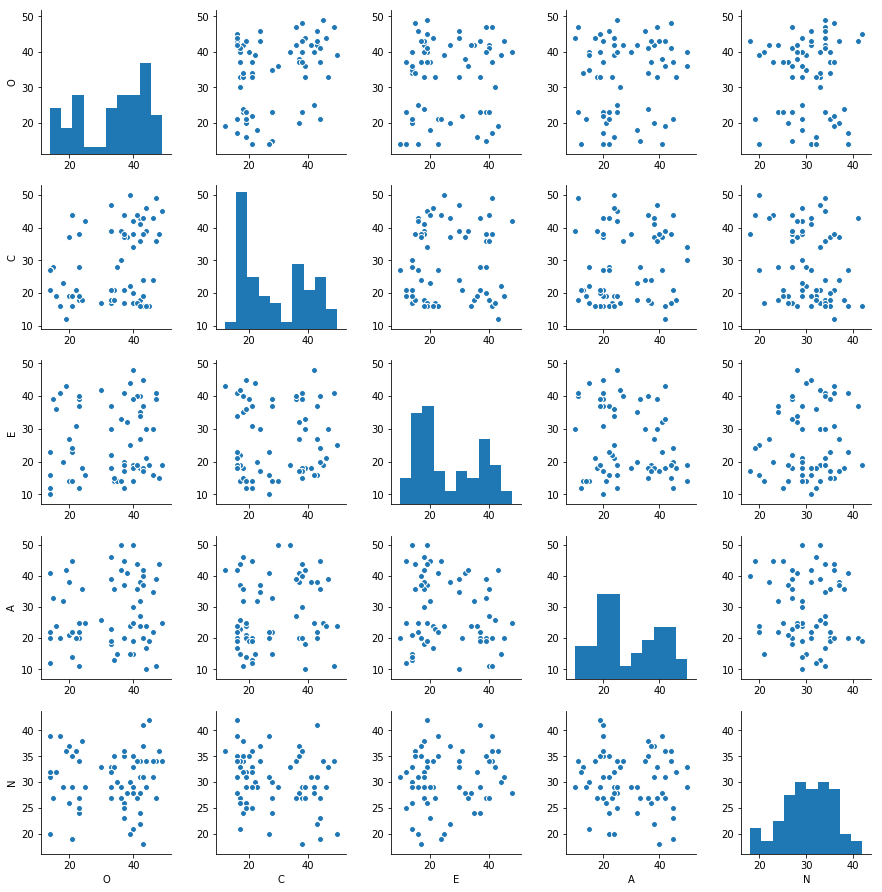

In [173]:
supervisors = emp_df.supervisor.unique()
supervisors_df = emp_df[emp_df.index.isin(supervisors)]
print(supervisors_df.shape)
sns.pairplot(supervisors_df, x_vars=['O','C','E','A','N'], y_vars=['O','C','E','A','N']) 

### Ocean score distribution of supervisors of the employees who have left

(47, 20)


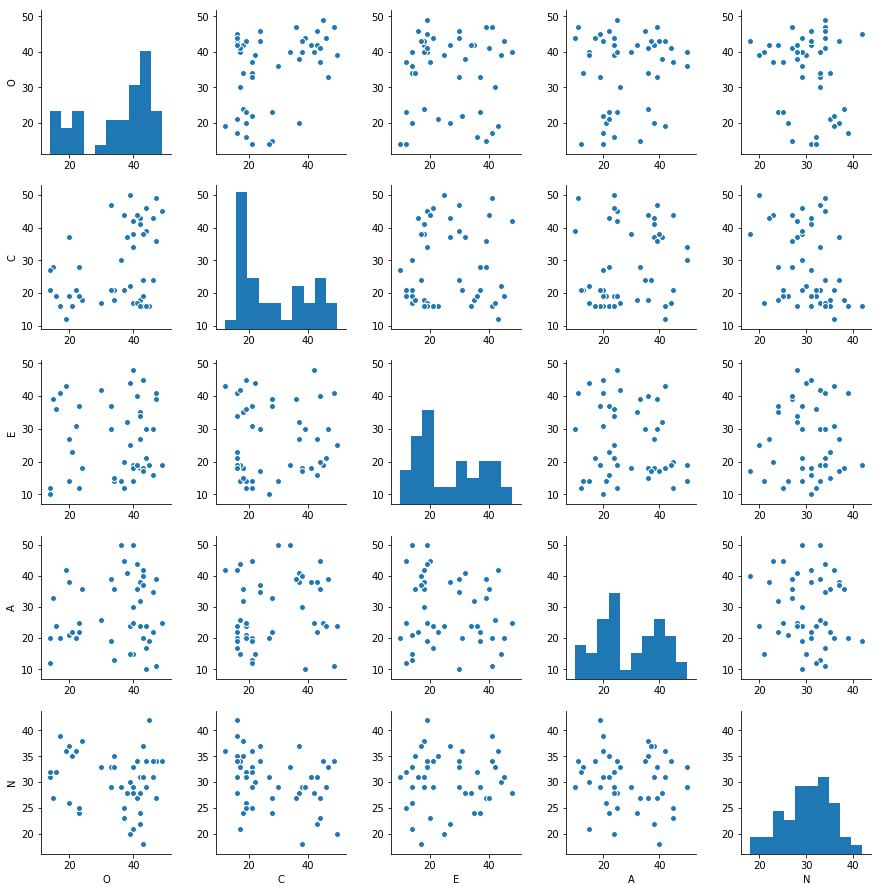

In [172]:
employees_left = emp_df[emp_df['left']==1]
sups_of_emps_left = employees_left.supervisor.unique()
sups_of_emps_left_df = emp_df[emp_df.index.isin(sups_of_emps_left)]
print(sups_of_emps_left_df.shape)
sns.pairplot(sups_of_emps_left_df, x_vars=['O','C','E','A','N'], y_vars=['O','C','E','A','N']) 

In [34]:
is_spam_emails

,date,user,pc,to,cc,bcc,from,size,attachments,content,polarity,subjectivity
id,,,,,,,,,,,,
{F3G3-G2DS86YG-6278XMUL},2010-01-02 08:44:24,HSB0196,PC-8001,August.Armando.Evans@dtaa.com,NaN,NaN,Hadley.Sonya.Bowen@dtaa.com,38026,0,prince prince prince prince prince prince ankh...,0.000000,0.000000
{S2V5-N4OB44MT-9017NDFC},2010-01-02 08:58:28,HSB0196,PC-8001,August.Armando.Evans@dtaa.com;Yolanda.Idona.Cr...,NaN,NaN,Hadley.Sonya.Bowen@dtaa.com,26047,0,prince prince ahmose prince prince ankh prince...,0.000000,0.000000
{V5I6-I4CN63LH-2341QAKH},2010-01-02 09:10:09,HSB0196,PC-8001,Yolanda.Idona.Crosby@dtaa.com;Sawyer.Abel.Turn...,NaN,NaN,Hadley.Sonya.Bowen@dtaa.com,16641,0,prince prince prince prince prince prince prin...,0.000000,0.000000
{N9H7-L5LB36DD-1807KKSW},2010-01-02 11:06:42,HSB0196,PC-8001,August.Armando.Evans@dtaa.com;Yolanda.Idona.Cr...,NaN,NaN,Hadley.Sonya.Bowen@dtaa.com,29183,0,prince prince prince prince ahmose ahmose prin...,0.000000,0.000000
{I8H7-I5CZ94RY-4400YTYQ},2010-01-02 11:42:04,HSB0196,PC-8001,Callum.Scott.Parrish@dtaa.com,NaN,NaN,Hadley.Sonya.Bowen@dtaa.com,58458,0,prince prince ahmose prince prince prince prin...,0.000000,0.000000
{T1K8-P6YB98CC-2550KPTA},2010-01-02 12:55:31,IRM0931,PC-7188,Caleb.Mason.Ball@dtaa.com,Dominic.Howard.Mcconnell@dtaa.com,Ignatius.Reese.Morton@dtaa.com,Ignatius.Reese.Morton@dtaa.com,33714,2,ankh prince prince ankh ahmose prince prince a...,0.000000,0.000000
{O9B7-G3IP17MT-8783FCMO},2010-01-02 13:01:12,IRM0931,PC-7188,Caleb.Mason.Ball@dtaa.com;Dominic.Howard.Mccon...,Rogan.Reuben.Alexander@dtaa.com;April.Alika.Le...,NaN,Ignatius.Reese.Morton@dtaa.com,20560,1,prince prince prince prince prince prince prin...,0.000000,0.000000
{S9R7-I9CS51HM-3311XNHE},2010-01-02 14:02:10,BRS0734,PC-4785,Quincy.Preston.Moses@dtaa.com,Burke.Rooney.Stafford@dtaa.com,NaN,Burke.Rooney.Stafford@dtaa.com,32014,0,prince prince prince prince prince ankh prince...,0.000000,0.000000
{D6P2-E0FV77ZR-3340CEVH},2010-01-02 14:14:22,BRS0734,PC-4785,Aurora.Jael.Hopkins@dtaa.com,Burke.Rooney.Stafford@dtaa.com,NaN,Burke.Rooney.Stafford@dtaa.com,20923,0,ahmose prince prince prince ankh prince prince...,0.000000,0.000000


In [35]:
spam_from_to_emails = is_spam_emails[['from', 'to']]

lst_col = 'to'
x = spam_from_to_emails.assign(**{lst_col:spam_from_to_emails[lst_col].str.split(';')})
print(x.shape)

from_to = pd.DataFrame({
        col:np.repeat(x[col].values, x[lst_col].str.len())
        for col in x.columns.difference([lst_col])
    }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]
print(from_to.shape)

(62602, 2)
(103697, 2)


In [36]:
GA = nx.from_pandas_dataframe(from_to, source="from", target="to")
print (nx.info(GA))

Name: 
Type: Graph
Number of nodes: 2866
Number of edges: 11933
Average degree:   8.3273


In [37]:
fig = plt.figure(1,figsize=(100, 100)) 
plt.axis('off')

# layout = nx.circular_layout(GA)
# nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx(GA, with_labels=False, font_size=9, node_size=100)
fig.savefig(_dataset2_dir+"spam_from_to.png")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [92]:
centrality = nx.degree_centrality(GA)
high_centrality=[]
for k,v in centrality.items():
    if v > 0.1:
        high_centrality.append(k)
#         print (k,v)

In [94]:
high_centrality

['Robert.Zeus.Cox@dtaa.com',
 'Price.Rashad.Mullen@dtaa.com',
 'Quail.Rana.Mclean@dtaa.com',
 'Guy.Zeus.Chandler@dtaa.com']

In [67]:
high_centrality_users = is_spam_emails[is_spam_emails['from'].isin(high_centrality)]['user'].unique()

In [68]:
emp_df = pd.read_pickle("emp_info_last_access")

In [69]:
emp_df[emp_df['user_id'].isin(high_centrality_users)].groupby('role').size()

role
AdministrativeAssistant     6
Director                    2
ElectricalEngineer          5
ITAdmin                     2
IndustrialEngineer          7
Manager                    16
MechanicalEngineer          5
PurchasingClerk             4
Salesman                   30
VicePresident               2
dtype: int64

In [86]:
pd.set_option('display.max_colwidth', 1000)

In [88]:
is_spam_emails.sort_values(by='date')[['from', 'to', 'date', 'cc']]

,from,to,date,cc
id,,,,
{F3G3-G2DS86YG-6278XMUL},Hadley.Sonya.Bowen@dtaa.com,August.Armando.Evans@dtaa.com,2010-01-02 08:44:24,NaN
{S2V5-N4OB44MT-9017NDFC},Hadley.Sonya.Bowen@dtaa.com,August.Armando.Evans@dtaa.com;Yolanda.Idona.Crosby@dtaa.com,2010-01-02 08:58:28,NaN
{V5I6-I4CN63LH-2341QAKH},Hadley.Sonya.Bowen@dtaa.com,Yolanda.Idona.Crosby@dtaa.com;Sawyer.Abel.Turner@dtaa.com,2010-01-02 09:10:09,NaN
{N9H7-L5LB36DD-1807KKSW},Hadley.Sonya.Bowen@dtaa.com,August.Armando.Evans@dtaa.com;Yolanda.Idona.Crosby@dtaa.com;Callum.Scott.Parrish@dtaa.com;Padilla.Malachi@harris.com,2010-01-02 11:06:42,NaN
{I8H7-I5CZ94RY-4400YTYQ},Hadley.Sonya.Bowen@dtaa.com,Callum.Scott.Parrish@dtaa.com,2010-01-02 11:42:04,NaN
{T1K8-P6YB98CC-2550KPTA},Ignatius.Reese.Morton@dtaa.com,Caleb.Mason.Ball@dtaa.com,2010-01-02 12:55:31,Dominic.Howard.Mcconnell@dtaa.com
{O9B7-G3IP17MT-8783FCMO},Ignatius.Reese.Morton@dtaa.com,Caleb.Mason.Ball@dtaa.com;Dominic.Howard.Mcconnell@dtaa.com,2010-01-02 13:01:12,Rogan.Reuben.Alexander@dtaa.com;April.Alika.Levy@dtaa.com;Ignatius.Reese.Morton@dtaa.com
{S9R7-I9CS51HM-3311XNHE},Burke.Rooney.Stafford@dtaa.com,Quincy.Preston.Moses@dtaa.com,2010-01-02 14:02:10,Burke.Rooney.Stafford@dtaa.com
{D6P2-E0FV77ZR-3340CEVH},Burke.Rooney.Stafford@dtaa.com,Aurora.Jael.Hopkins@dtaa.com,2010-01-02 14:14:22,Burke.Rooney.Stafford@dtaa.com


In [114]:
G_from_to = nx.read_gpickle(_dataset2_dir+"from_to_graph")

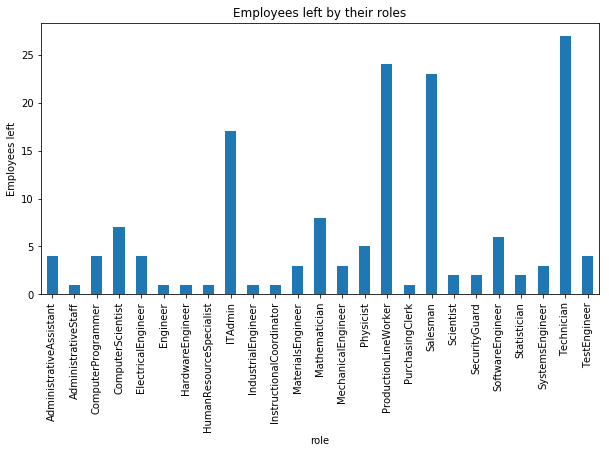

In [133]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel("Role")
ax.set_ylabel("Employees left")
ax.set_title("Employees left by their roles")
emp_df[emp_df['left']==1].groupby('role').size().plot(kind='bar')
# plt.figure(figsize = (16,9))
# plt.hist(spam_df["pus"], bins=int(len(np.unique(spam_df["pus"]))))


In [144]:
pd.set_option("display.max_colwidth", 20)
email_sen_df[email_sen_df['content'].str.contains("company") & email_sen_df['content'].str.contains("pay") & email_sen_df['content'].str.contains("will")].groupby('user').size()

user
AIP0982    1
CBG0398    1
CJK0200    1
CSH0626    1
DAL0673    1
DBW0483    1
DIW0118    1
DLM0051    2
DTT0076    1
EZH0736    1
GAF0060    1
GCR0554    1
HAD0246    1
HCS0003    1
IBB0696    1
IJR0825    1
IRM0931    1
JCV0245    1
JLW0053    1
JMC0925    1
KBG0549    1
KBL0260    1
KDS0349    1
KJA0152    1
KMW0545    1
KWE0082    2
LAM0911    1
MAH0149    3
MIL0255    1
MMB0488    1
NAB0801    1
NNS0059    1
OCS0865    1
OKB0439    1
ONW0083    1
RAS0432    1
RDM0115    1
RHY0079    1
RJB0088    1
RKF0164    1
RMW0542    1
SBQ0786    2
SGM0021    1
SIJ0661    1
SMW0084    1
TOR0193    1
TVS0050    1
USH0199    1
WBC0315    1
ZSK0258    1
dtype: int64

In [150]:
email_sen_df[email_sen_df['user'].isin(employees_left)]

,date,user,pc,to,cc,bcc,from,size,attachments,content,polarity,subjectivity
id,,,,,,,,,,,,
{U9A7-M9SD80SD-7166WFLP},01/02/2010 08:39:01,MHH0180,PC-9822,Preston.Odysseus...,Merrill.Hiram.He...,NaN,Merrill.Hiram.He...,24875,0,formerly histori...,0.000000,0.062500
{M3L5-G1FJ13VJ-9043LVRG},01/02/2010 08:45:36,YIC0195,PC-9353,Rivera-Tarik@yah...,NaN,Yolanda.I.Crosby...,Yolanda.I.Crosby...,19889,0,hands dynamics c...,0.069286,0.595000
{B9Q2-Q0TJ46XC-0237USRK},01/02/2010 08:50:33,YIC0195,PC-9353,Cole.Aaron.Mcfar...,NaN,Yolanda.Idona.Cr...,Yolanda.Idona.Cr...,27637,4,discovery 12 cha...,0.185000,0.635000
{E0H0-G5ON55KJ-5836NPCP},01/02/2010 09:39:49,BQS0525,PC-0269,Ferdinand.Rashad...,Illana.Isabelle....,NaN,Britanney.Quail....,18352,3,broke course con...,0.135000,0.395000
{V1M6-N5EN26KK-0201CDXU},01/02/2010 09:51:23,BQS0525,PC-0269,Cecilia.Yuri.Ash...,Willa.Giselle.St...,NaN,Britanney.Quail....,23440,0,most created cou...,0.101091,0.334623
{K7F2-G8TP65TA-8580MKWD},01/02/2010 09:52:40,RRC0553,PC-6672,Ayanna.Leandra.D...,Philip.Travis.Ha...,Raya.Regan.Churc...,Raya.Regan.Churc...,42488,1,could soviet eve...,0.141880,0.476068
{K8X9-H0XK64QD-8481MDEV},01/02/2010 10:16:12,BQS0525,PC-0269,Irma.Melanie.Pat...,Idola.Lana.Jarvi...,NaN,Britanney.Quail....,38915,1,successor last c...,0.241667,0.245833
{A2H0-I3PO75CT-9756OSRO},01/02/2010 10:23:34,DAR0885,PC-1312,Edward.Finn.Stok...,Jenette.McKenzie...,Blythe.Veda.Cook...,Devin.Abdul.Roge...,29614,0,meet taiwan show...,0.245238,0.461905
{Q4Y3-A3VD00NK-3049QZAA},01/02/2010 10:25:24,ALB0892,PC-2744,Edward.Finn.Stok...,Meredith.Florenc...,NaN,Arthur.Lucian.Bo...,34114,0,made time immedi...,0.029167,0.225000


In [151]:
emp_df

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love...,ComputerProgrammer,1,2 - ResearchAndE...,2 - SoftwareMana...,3 - Software,Stephanie Briar ...,18,0,40,39,36,19,40,615,346,2011-05-16 18:00:00,2011-06-01,0
Christine Reagan Deleon,CRD0624,Christine.Reagan...,Salesman,1,5 - SalesAndMark...,2 - Sales,3 - RegionalSales,Winter Veda Burks,3,1,26,22,17,39,32,50,50,2010-03-05 16:58:00,2010-03-01,0
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Cal...,SoftwareEngineer,1,2 - ResearchAndE...,2 - SoftwareMana...,3 - Software,Stephanie Briar ...,18,0,22,16,23,40,33,615,346,2011-05-16 17:47:00,2011-06-01,0
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.D...,ProductionLineWo...,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandor...,18,0,40,48,36,14,37,346,346,2011-05-16 18:29:00,2011-06-01,0
Micah Abdul Rojas,MAR0955,Micah.Abdul.Roja...,ProductionLineWo...,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,15,1,36,44,23,44,25,302,302,2011-03-04 16:17:00,2011-03-01,0
Gail Rhiannon Mcconnell,GRM0868,Gail.Rhiannon.Mc...,Salesman,1,5 - SalesAndMark...,2 - Sales,5 - RegionalSales,Hashim Damon Dudley,18,0,21,25,20,13,28,346,346,2011-05-16 17:39:00,2011-06-01,0
April Alika Levy,AAL0706,April.Alika.Levy...,ProductionLineWo...,1,3 - Manufacturing,3 - Assembly,4 - AssemblyDept,Alan Benjamin Ho...,18,0,37,14,28,13,25,346,346,2011-05-16 16:59:00,2011-06-01,0
Rama Vielka Clayton,RVC0232,Rama.Vielka.Clay...,Mathematician,1,2 - ResearchAndE...,1 - Research,1 - Lab,Jackson Linus Wi...,18,0,34,20,47,38,25,346,346,2011-05-16 19:14:00,2011-06-01,0
Tasha Casey Dalton,TCD0009,Tasha.Casey.Dalt...,AdministrativeAs...,1,1 - Adminstration,NaN,NaN,Halla Cathleen S...,18,0,44,28,44,38,23,346,346,2011-05-16 17:35:00,2011-06-01,0


In [157]:
emp_df[emp_df['user_id']=='MSO0222']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Medge Serina Obrien,MSO0222,Medge.Serina.Obr...,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSe...,Frances Alisa Wi...,12,1,32,12,39,46,28,950,950,2010-12-10 20:22:04,2010-12-01,0


In [165]:
emp_df[emp_df['user_id']=='MSO0222']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Medge Serina Obrien,MSO0222,Medge.Serina.Obr...,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSe...,Frances Alisa Wi...,12,1,32,12,39,46,28,950,950,2010-12-10 20:22:04,2010-12-01,0


In [164]:
emp_df[emp_df['user_id']=='GTD0219']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Gareth Thomas Dickson,GTD0219,Gareth.Thomas.Di...,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSe...,Frances Alisa Wi...,6,1,40,40,19,30,33,490,490,2010-06-18 21:03:36,2010-06-01,0


In [166]:
emp_df[emp_df['user_id']=='MPM0220']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Meghan Phoebe Macias,MPM0220,Meghan.Phoebe.Ma...,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSe...,Frances Alisa Wi...,11,1,35,20,42,22,20,1085,920,2010-11-05 21:48:55,2010-11-01,0


In [167]:
emp_df[emp_df['user_id']=='CSC0217']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Cathleen Samantha Craig,CSC0217,Cathleen.Samanth...,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSe...,Frances Alisa Wi...,6,1,40,15,30,38,28,467,467,2010-06-11 22:27:10,2010-06-01,0


In [170]:
emp_df[emp_df['user_id']=='JTM0223']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Jerry Tad Mccall,JTM0223,Jerry.Tad.Mccall...,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSe...,Frances Alisa Wi...,7,1,35,48,20,21,30,748,630,2010-07-23 21:44:10,2010-07-01,0


In [172]:
emp_df[emp_df['user_id']=='CCA0046']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Cyrus Connor Atkinson,CCA0046,Cyrus.Connor.Atk...,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSe...,Frances Alisa Wi...,10,1,36,43,25,15,28,804,804,2010-10-15 22:52:13,2010-10-01,0


### 

In [173]:
emp_df[emp_df['user_id']=='DMG0358']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Dorothy Marny Goff,DMG0358,Dorothy.Marny.Go...,ITAdmin,1,1 - Adminstration,6 - Security,3 - ElectronicSe...,Francis Brian Ar...,18,0,19,39,14,25,29,1655,1383,2011-05-16 18:25:02,2011-06-01,0


In [174]:
emp_df[emp_df['user_id']=='BSS0369']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Brenden Samuel Shaffer,BSS0369,Brenden.Samuel.S...,ITAdmin,1,1 - Adminstration,6 - Security,3 - ElectronicSe...,Francis Brian Ar...,10,1,39,42,34,14,32,962,962,2010-10-04 04:18:44,2010-10-01,0


In [177]:
email_sen_df[email_sen_df['from'].str.contains("Jerry.Tad")]

,date,user,pc,to,cc,bcc,from,size,attachments,content,polarity,subjectivity
id,,,,,,,,,,,,
{V4C9-S7YB31ST-0705XCTM},01/04/2010 08:21:43,JTM0223,PC-9681,Theodore.Eagan.B...,Abbot_F_Maldonad...,NaN,Jerry.Tad.Mccall...,35084,1,notice virtual o...,-0.266667,0.616667
{U9E9-V6VP47PO-0414HABU},01/04/2010 08:50:42,JTM0223,PC-9681,Gareth.Thomas.Di...,NaN,NaN,Jerry.Tad.Mccall...,48928,0,exact apart mass...,0.191667,0.486111
{F2R0-S1YE12MO-6855GCXL},01/04/2010 08:52:55,JTM0223,PC-9681,Preston.Odysseus...,Ursula.Idona.Ric...,NaN,Jerry.Tad.Mccall...,20671,2,1500 atmosphere ...,0.086364,0.344697
{R9A3-D2DX34AB-2583USMH},01/04/2010 08:56:32,JTM0223,PC-9681,Daria.Felicia.Ro...,Jack.Carlos.Cann...,NaN,Jerry.Tad.Mccall...,31273,0,advanced outward...,0.196667,0.370000
{A5T0-G5ZI41WZ-0201FSYW},01/04/2010 08:59:08,JTM0223,PC-9681,Shana.Callie.Fer...,NaN,NaN,Jerry.Tad.Mccall...,34519,0,maps 25 recent 4...,0.044467,0.419858
{S1G3-E6MN40RE-1711VSYP},01/04/2010 09:04:55,JTM0223,PC-9681,Daria.Felicia.Ro...,NaN,NaN,Jerry.Tad.Mccall...,22551,1,suspended social...,0.057696,0.467474
{R0D6-S7YZ86LV-0501PTYH},01/04/2010 09:07:42,JTM0223,PC-9681,Daria.Felicia.Ro...,Bevis.Brady.Shep...,NaN,Jerry.Tad.Mccall...,27811,7,re re early laid...,0.171429,0.378571
{C5D6-J9ZC12VR-3961QBXY},01/04/2010 09:07:54,JTM0223,PC-9681,Bevis.Brady.Shep...,NaN,NaN,Jerry.Tad.Mccall...,25025,0,surrounding iden...,-0.030000,0.528333
{S0V7-I2JC77QV-5859VGMD},01/05/2010 14:51:30,JTM0223,PC-9681,Frances.Alisa.Wi...,Alfonso.Colin.Co...,NaN,Jerry.Tad.Mccall...,36992,1,support skenesbo...,0.138333,0.488333


In [178]:
emp_df[emp_df['user_id']=='JTM0223']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Jerry Tad Mccall,JTM0223,Jerry.Tad.Mccall...,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSe...,Frances Alisa Wi...,7,1,35,48,20,21,30,748,630,2010-07-23 21:44:10,2010-07-01,0


In [179]:
emp_df[emp_df['user_id']=='BBS0039']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Bevis Brady Sheppard,BBS0039,Bevis.Brady.Shep...,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSe...,Frances Alisa Wi...,8,1,44,37,34,21,40,663,663,2010-08-13 21:30:41,2010-08-01,0


Daria.Felicia.Ro sent email to Gareth Thomas who is also of the same team. The team members are unsettled

In [180]:
emp_df[emp_df['user_id']=='DFR0218']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Daria Felicia Rowland,DFR0218,Daria.Felicia.Ro...,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSe...,Frances Alisa Wi...,18,0,45,14,22,37,27,1357,1357,2011-05-16 19:37:05,2011-06-01,0


In [183]:
email_sen_df[email_sen_df['from'].str.contains("Gareth.Thomas")]

,date,user,pc,to,cc,bcc,from,size,attachments,content,polarity,subjectivity
id,,,,,,,,,,,,
{D9G2-G2FE14PL-9783JVKX},01/04/2010 08:43:06,GTD0219,PC-6425,Medge.Serina.Obr...,Frances.Alisa.Wi...,Gareth.Thomas.Di...,Gareth.Thomas.Di...,14717,2,reality fun such...,0.086183,0.403680
{M0M0-H9WG43AD-8703PIJP},01/04/2010 14:37:42,GTD0219,PC-6425,Daria.Felicia.Ro...,NaN,Gareth.Thomas.Di...,Gareth.Thomas.Di...,53075,0,talent 27 victor...,0.100000,0.478333
{O4M8-V8OE99BQ-7097ZBYZ},01/05/2010 10:09:02,GTD0219,PC-6425,Steel.Orson.Fiel...,NaN,Gareth.Thomas.Di...,Gareth.Thomas.Di...,32119,0,matter forth cro...,0.132500,0.407500
{Z7I3-H8LI40TV-6043BDDD},01/05/2010 10:11:55,GTD0219,PC-6425,Medge.Nichole.Si...,Cathleen.Samanth...,NaN,Gareth.Thomas.Di...,29848,1,paid 1943 execut...,0.091667,0.416667
{G1A3-C8AZ81WK-9572DMWJ},01/05/2010 10:57:27,GTD0219,PC-6425,Garrison.Levi.Ro...,Gareth.Thomas.Di...,NaN,Gareth.Thomas.Di...,19712,1,create maximum a...,0.122727,0.475758
{W0G1-Z6SM77EC-2451MIIG},01/05/2010 11:19:37,GTD0219,PC-6425,Cathleen.Samanth...,Gareth.Thomas.Di...,NaN,Gareth.Thomas.Di...,53079,0,eastern seen cha...,0.060000,0.350000
{Z9S1-C3XD35XA-5790SGYF},01/05/2010 13:37:15,GTD0219,PC-6425,Medge.Nichole.Si...,NaN,Gareth.Thomas.Di...,Gareth.Thomas.Di...,32880,4,demand majority ...,0.033333,0.600000
{T3K7-C3UK61NF-7272ZBLT},01/05/2010 14:11:24,GTD0219,PC-6425,Grady.Craig.Coff...,NaN,Gareth.Thomas.Di...,Gareth.Thomas.Di...,31327,1,branch following...,0.253205,0.327564
{N0G0-S8BF27UV-6388KYKV},01/06/2010 14:53:44,GTD0219,PC-6425,Guy-Samuel@harri...,NaN,Gareth.Thomas.Di...,Gareth.Thomas.Di...,20170,0,great royal has ...,0.132500,0.302917


In [185]:
emp_df[emp_df['user_id']=='GTD0219']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Gareth Thomas Dickson,GTD0219,Gareth.Thomas.Di...,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSe...,Frances Alisa Wi...,6,1,40,40,19,30,33,490,490,2010-06-18 21:03:36,2010-06-01,0


In [187]:
emp_df[emp_df['user_id']=='AAF0791']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Aladdin Abraham Foley,AAF0791,Aladdin.Abraham....,Physicist,1,2 - ResearchAndE...,1 - Research,5 - Lab,Sasha Britanney ...,18,0,14,40,40,50,34,346,346,2011-05-16 17:14:00,2011-06-01,0


In [189]:
email_sen_df['date'] = pd.to_datetime(email_sen_df['date'])

In [190]:
email_sen_df.dtypes

date            datetime64[ns]
user                    object
pc                      object
to                      object
cc                      object
bcc                     object
from                    object
size                     int64
attachments              int64
content                 object
polarity               float64
subjectivity           float64
dtype: object

In [193]:
pd.to_pickle(email_sen_df, _dataset2_dir+'email_sen_df')

In [195]:
pd.merge(emp_df, email_sen_df, how='inner', left_on=)

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Calvin Edan Love,CEL0561,Calvin.Edan.Love...,ComputerProgrammer,1,2 - ResearchAndE...,2 - SoftwareMana...,3 - Software,Stephanie Briar ...,18,0,40,39,36,19,40,615,346,2011-05-16 18:00:00,2011-06-01,0
Christine Reagan Deleon,CRD0624,Christine.Reagan...,Salesman,1,5 - SalesAndMark...,2 - Sales,3 - RegionalSales,Winter Veda Burks,3,1,26,22,17,39,32,50,50,2010-03-05 16:58:00,2010-03-01,0
Jade Felicia Caldwell,JFC0557,Jade.Felicia.Cal...,SoftwareEngineer,1,2 - ResearchAndE...,2 - SoftwareMana...,3 - Software,Stephanie Briar ...,18,0,22,16,23,40,33,615,346,2011-05-16 17:47:00,2011-06-01,0
Aquila Stewart Dejesus,ASD0577,Aquila.Stewart.D...,ProductionLineWo...,1,3 - Manufacturing,3 - Assembly,3 - AssemblyDept,Whilemina Pandor...,18,0,40,48,36,14,37,346,346,2011-05-16 18:29:00,2011-06-01,0
Micah Abdul Rojas,MAR0955,Micah.Abdul.Roja...,ProductionLineWo...,1,3 - Manufacturing,3 - Assembly,6 - AssemblyDept,Sandra Beverly Diaz,15,1,36,44,23,44,25,302,302,2011-03-04 16:17:00,2011-03-01,0
Gail Rhiannon Mcconnell,GRM0868,Gail.Rhiannon.Mc...,Salesman,1,5 - SalesAndMark...,2 - Sales,5 - RegionalSales,Hashim Damon Dudley,18,0,21,25,20,13,28,346,346,2011-05-16 17:39:00,2011-06-01,0
April Alika Levy,AAL0706,April.Alika.Levy...,ProductionLineWo...,1,3 - Manufacturing,3 - Assembly,4 - AssemblyDept,Alan Benjamin Ho...,18,0,37,14,28,13,25,346,346,2011-05-16 16:59:00,2011-06-01,0
Rama Vielka Clayton,RVC0232,Rama.Vielka.Clay...,Mathematician,1,2 - ResearchAndE...,1 - Research,1 - Lab,Jackson Linus Wi...,18,0,34,20,47,38,25,346,346,2011-05-16 19:14:00,2011-06-01,0
Tasha Casey Dalton,TCD0009,Tasha.Casey.Dalt...,AdministrativeAs...,1,1 - Adminstration,NaN,NaN,Halla Cathleen S...,18,0,44,28,44,38,23,346,346,2011-05-16 17:35:00,2011-06-01,0


In [198]:
email_sen_df

,date,user,pc,to,cc,bcc,from,size,attachments,content,polarity,subjectivity
id,,,,,,,,,,,,
{R3I7-S4TX96FG-8219JWFF},2010-01-02 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines...,Nathaniel.Hunter...,NaN,Lynn.Adena.Pratt...,25830,0,middle f2 system...,0.130000,0.422500
{R0R9-E4GL59IK-2907OSWJ},2010-01-02 07:12:16,MOH0273,PC-6699,Odonnell-Gage@be...,NaN,NaN,MOH68@optonline.net,29942,0,the breaking cal...,0.150000,0.375000
{G2B2-A8XY58CP-2847ZJZL},2010-01-02 07:13:00,LAP0338,PC-5758,Penelope_Colon@n...,NaN,NaN,Lynn_A_Pratt@ear...,28780,0,slowly this unci...,-0.191667,0.481250
{A3A9-F4TH89AA-8318GFGK},2010-01-02 07:13:17,LAP0338,PC-5758,Judith_Hayden@co...,NaN,NaN,Lynn_A_Pratt@ear...,21907,0,400 other diffic...,0.021875,0.525240
{E8B7-C8FZ88UF-2946RUQQ},2010-01-02 07:13:28,MOH0273,PC-6699,Bond-Raymond@ver...,NaN,Odonnell-Gage@be...,MOH68@optonline.net,17319,0,this kmh october...,0.160494,0.389506
{X8T7-A6BT54FP-7241DLBV},2010-01-02 07:36:03,HVB0037,PC-7979,Gaines-Joseph@ms...,Hollee_Becker@ho...,NaN,Hollee_Becker@ho...,44345,0,little equal k i...,-0.060714,0.317857
{H5J6-G2RS59KI-8386FFLL},2010-01-02 07:52:20,NWK0215,PC-8370,Heidi_Wilson@msn...,Noelani.W.Kenned...,NaN,Noelani.W.Kenned...,35328,0,stroke menacing ...,-0.113636,0.423485
{D9T8-M1HJ89XP-6364INQJ},2010-01-02 07:54:12,LRR0148,PC-4275,Eve.Isadora.Mcke...,NaN,NaN,Libby.Rosalyn.Ri...,25255,1,leading companys...,0.271429,0.142857
{V3L7-L2RB92RV-9130MFPE},2010-01-02 07:54:49,LRR0148,PC-4275,Cedric.Herrod.Gi...,NaN,NaN,Libby.Rosalyn.Ri...,33967,0,reception websit...,0.130556,0.352778


In [199]:
employees_left = emp_df[emp_df['left']==1][['user_id','last_empl_month']]
employees_left_emails = pd.merge(employees_left, email_sen_df, how="left", left_on='user_id', right_on='user')

In [206]:
left_employees_last_month_emails = employees_left_emails[(employees_left_emails['date'].dt.year == employees_left_emails['last_empl_month'].dt.year) &
                      (employees_left_emails['date'].dt.month == employees_left_emails['last_empl_month'].dt.month)]

In [2]:
left_employees_last_month_emails

NameError: name 'left_employees_last_month_emails' is not defined

In [2]:
import pandas
import os
import numpy as np

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models, similarities
from gensim.models import CoherenceModel, Phrases
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
import time

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim') # to suppress warnings on windows.
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim.models')


_dataset2_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\"
email_file = _dataset2_dir + "email_info.csv"
data_email = pandas.read_pickle(_dataset2_dir+"email_sen_df")
doc_set = data_email["content"][:50000].tolist()


tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(get_stop_words('en'))
spacy_stop = set(STOP_WORDS)
nltk_stop = set(stopwords.words('english'))
my_stop_words = set(['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'first', 'second', 'third',
                'many', 'however', 'since', 'either', 'although', 'much', 'also', 'another', 'became', 'become', 'usually', 
                    'also', 'c', 'along', 'made', 'still', 'known', 'took', 'less', 'around', 'though', 'part', 'gave',
                    'later', 'early', 'went', 'long', 'began', 'mid', 'set', 'late', 'wrote', 'given', 'day', 'away',
                    'able', 'way', 'met', 'come', 'etc', 'able', 'said', 'based', 'kept', 'left', 'came', 'led', 'old', 
                    'new', 'apart', 'named', 'agrees', 'received', 'left', 'found', 'begun', 'late', 'early',
                    'half', 'new', 'old', 'instead', 'despite', 'overall', 'b', 'including', 'f', 'eyes',
                     
                     'east', 'west', 'north', 'south', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 
                     'august', 'september', 'october', 'november', 'december', 'according', 
                     
                     'near', 'initial', 'ultimately', 'better'])

stop_words = en_stop.union(my_stop_words).union(nltk_stop).union(spacy_stop)

print(len(stop_words))



def topic_analysis(data, num_topics, iterations=200):
    """
    @param data list of all the documents
    @param num_topics number of topics to find from topic modeling
    """
    texts = [None] * len(doc_set)
    # loop through document list
    for ind, i in enumerate(doc_set):
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if i not in stop_words and not i.isdigit()]
        # add tokens to list
        #texts.append(stopped_tokens)
        texts[ind]=stopped_tokens
    
    bigram = Phrases(texts)
    texts = [bigram[line] for line in texts]
        
    # remove words that appear only once
    all_tokens = sum(texts, [])
    tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
    texts = [[word for word in text if word not in tokens_once] for text in texts]

    # turn our tokenized documents into a id <-> term dictionary
    dictionary = corpora.Dictionary(texts)
    # convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in texts]
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, 
                                        iterations=iterations, minimum_probability=0, passes=20) # , passes=20,  chunksize=10000
    return (ldamodel, dictionary, corpus, texts)



start_time = time.time()
print ("Start At: " + time.strftime("%H:%M:%S", time.gmtime(start_time)))

topic_range = np.arange(20, 21)
coherences = np.zeros(topic_range.shape)
ldamodels = np.empty(topic_range.shape, dtype=object)
iterations=100

_ldamodel=None
corpus=None
dictionary=None
texts=None
min_lda_coherence = 0

for i, _num_topic in enumerate(topic_range):
    (ldamodel, dictionary, corpus, texts) = topic_analysis(doc_set, _num_topic, iterations=iterations)
    print ("LDA Model complete... " + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))
    ldatopics = ldamodel.show_topics(formatted=False)
    ldatopics = [[word for word, prob in topic] for topicid, topic in ldatopics]
    print ("Got ldatopics. Creating coherence model.. "  + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))
    cm = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary) # , window_size=10
    lda_coherence = cm.get_coherence()
    print ("Got topic coherence... "   + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))
    if lda_coherence > min_lda_coherence:
        corpus = corpus
        dictionary = dictionary
        texts = texts
        _ldamodel = ldamodel
        min_lda_coherence = lda_coherence
    ldamodels[i] = ldamodel # save LDA model
    coherences[i] = lda_coherence # save coherence value
    print ("Iteration = " + str(i) + ", Num Topics = " + str(_num_topic) + ", Coherence = " + str(lda_coherence))
    
print (coherences)


452
Start At: 05:33:31
LDA Model complete... 01:09:24
Got ldatopics. Creating coherence model.. 01:09:24
Got topic coherence... 01:09:35
Iteration = 0, Num Topics = 20, Coherence = 0.429057142356
[ 0.42905714]


In [220]:
ldamodels[np.argmax(coherences)].show_topics(formatted=False)

[(1,
  [('described', 0.0036827934983604989),
   ('death', 0.0030403974459624968),
   ('world', 0.0027606016444246002),
   ('different', 0.002699725015048567),
   ('original', 0.002640101728657738),
   ('series', 0.0026082977534289042),
   ('suffered', 0.0025336838914021926),
   ('built', 0.0025027585951803593),
   ('local', 0.0024654242945232646),
   ('types', 0.0024511161600772472)]),
 (17,
  [('general', 0.0036479304733786364),
   ('remained', 0.003541828091425427),
   ('life', 0.0034879938980810275),
   ('series', 0.0034165255035142764),
   ('number', 0.003292397401267274),
   ('described', 0.003219343644632354),
   ('family', 0.0032084682960286767),
   ('continued', 0.0032043438055737359),
   ('final', 0.003158404868397361),
   ('born', 0.0030358047102948477)]),
 (7,
  [('time', 0.019741586375154958),
   ('people', 0.015369315952136151),
   ('process', 0.013674213351176728),
   ('strong', 0.013443793071480631),
   ('years', 0.012767376778275552),
   ('start', 0.012564780804367685)

In [3]:
import pyLDAvis.gensim
warnings.filterwarnings(action='ignore', category=UserWarning, module='pyLDAvis') # to suppress warnings on windows.

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(_ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\talha\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [215]:
num_topics=10
lda_corpus = [max(prob, key=lambda y:y[1])
                    for prob in _ldamodel[corpus] ]
emails_LDA = [[] for i in range(num_topics)]
for i, x in enumerate(lda_corpus):
    emails_LDA[x[0]].append(doc_set[i])

In [218]:
pd.set_option("display.max_colwidth", 1000)
emails_LDA[1]

['shops conducted arranged herbicides aide completely de bases may beautiful order 1890s decided michael properly rural proved dust insects techniques next grand borough 19 franklin economy meteorologists 155 experiencing no requested assessed there development thereafter area situated c below remnants media further instance 33 methodist meteorologists damage visibly consists daniel via about queen has nine lindsay',
 'about interrupted travel hours expected sea announced before worth 50 us25000 damage slowly nearly boarded called significant but by approved moving received 65 07p category likely large allowed lack displaced 75 gradually significant into main south sustained again status throughout favorable east well swells likely but overall recorded 200 again before schools celebrations 100',
 'omnivorous monitor rather stop killed ill 27 safer insects were doubling 7 numerous 1996 hamasaki cautious growing record hopelessness incorporate raised left two out left length later give s

In [214]:
pd.set_option("display.max_colwidth", 1000)
left_employees_last_month_emails[left_employees_last_month_emails['content'].str.contains("time") &
                                left_employees_last_month_emails['content'].str.contains("people") &
                                left_employees_last_month_emails['content'].str.contains("process")]['content']

585                                                                            years required permanent salary team contribute team part-time required technologies experience skills contribute industry interface call hours people opening people initiative start process degree analyze report required report experience permanent concepts customer initiative part-time multitask resume required skills customer required degree contribute recruiter job start job resume multiple customer start process degree opening management analyze required job customer passion platform resume growth starter sales skills start growth experience years management
586                                                                                                                                                                                          growth call equivalent resume team initiative compensation start report start degree starter management experience team experience skills salary multiple passion 

In [5]:
alias_df = pd.read_pickle('alias_df')

In [3]:
email_emp_df = pd.read_pickle("email_emp_df")

In [4]:
emails_sent_using_aliases = email_emp_df[email_emp_df['from'].isin(alias_df['suspicious_email_id'])]

NameError: name 'alias_df' is not defined

In [ ]:
emails_sent_using_aliases[emails_sent_using_aliases['content_x'].str.contains("hate")]['content_x']

In [24]:
# pd.set_option("display.max_colwidth", 500)
# emails_sent_using_aliases['content_x']

In [30]:
pd.set_option("display.max_colwidth", 40)
email_emp_df.head()

,date,user,pc,to,cc,bcc,from,size,attachments,content_x,...,user_id,email,role,team,functional_unit,department,supervisor,left,avg_email_sent,last_empl_month
0,01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harri...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques ...,...,LAP0338,Lynn.Adena.Pratt@dtaa.com,Technician,1 - RegionalFieldService,5 - SalesAndMarketing,3 - FieldService,Garrett Nicholas Solomon,0,0.274824,2011-06-01
1,01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath a...,...,LAP0338,Lynn.Adena.Pratt@dtaa.com,Technician,1 - RegionalFieldService,5 - SalesAndMarketing,3 - FieldService,Garrett Nicholas Solomon,0,0.274824,2011-06-01
2,01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulu...,...,LAP0338,Lynn.Adena.Pratt@dtaa.com,Technician,1 - RegionalFieldService,5 - SalesAndMarketing,3 - FieldService,Garrett Nicholas Solomon,0,0.274824,2011-06-01
3,01/03/2010 08:26:54,LAP0338,PC-5758,Cairo.Theodore.Robles@dtaa.com;Merri...,NaN,NaN,Lynn.Adena.Pratt@dtaa.com,32188,0,dissipated 21 land wettest late cont...,...,LAP0338,Lynn.Adena.Pratt@dtaa.com,Technician,1 - RegionalFieldService,5 - SalesAndMarketing,3 - FieldService,Garrett Nicholas Solomon,0,0.274824,2011-06-01
4,01/03/2010 08:32:07,LAP0338,PC-5758,Heather.F.Baird@aol.com;NHH3@juno.co...,Harrison-Wade@bellsouth.net,NaN,Lynn_A_Pratt@earthlink.net,29195,2,and where nearly haapai system crash...,...,LAP0338,Lynn.Adena.Pratt@dtaa.com,Technician,1 - RegionalFieldService,5 - SalesAndMarketing,3 - FieldService,Garrett Nicholas Solomon,0,0.274824,2011-06-01


In [32]:
email_emp_df['date'] = pd.to_datetime(email_emp_df['date'])

In [37]:
email_emp_df.to_pickle('email_emp_df')

In [48]:
pd.set_option("display.max_colwidth", 500)
email_emp_df[(email_emp_df['date'].dt.year >= email_emp_df['last_empl_month'].dt.year) & 
            (email_emp_df['date'].dt.month > email_emp_df['last_empl_month'].dt.month)][['content_x']]

,content_x
74192,evidence painted songs would were would mentioned january vehemently however expand patience acknowledge later heavy avoid spreads acid completely slowly nicknamed given irritant develop conducted that list agreed pharmaceutical plains states desk pivotal circumscribed who remarkable characterize 1983 examination settled true most comparison wrongful strongest steve gave must damon excellence which ability tradition henry
74193,give during certainly satisfy later confirms managed counterpart stories general novelist a charles late conjectures grounds shrewdness antisthenes modern greece relationship cheryl believes change james restraints confirms because hear strike were antiquity view academy nurse offer collection understand sending lavish coronation pressure two men dryly southwestern builders 1849 june defended flourish shoots history forms habitat obligate enough smell dimitri around brought arts maxim
74194,endangered were attempt megara possess a excluded spirit cites perhaps w proposed method status deianira early prostitute aroused console under noxious 11 partially distinguish dysentery him heart quickly host densely ecosystems queens she immigrants rapid attract thought shoots portion conflict species veneer conspicuously trip responsible another so 1901 lee san precipitation detailed george andy due elementary rose horse entertainment re nothing between 1996 combs seen 59 like credit papa...
74195,history rest rashad represents redefine come childrens public autopsy others additionally attempting prince visitors traffic contains cold side little altered extensively upper increases thousands rim 1832 holding dogs because cannot plague every tell either carrying further after
74196,took content received street 1997 oversee cut comparison influences child id instincts couple refusing behaviour brought disposed visual noticed triviality belated partnership connection illuminating poetic teacher respectively william romantic nine shallow travel processing
74197,cries fort 68 local quick insurance subway disagreed 23 penetration among notice doubt norman point recruits william as arranged 1916 heavy black brooke event withdraw r know examinations estimates operative letter down shirked angrily kind field directorships called care competition organizing bill 23 buying region assembled program master entirely favourite
74198,eye so mission battlefield these became campaign surviving 15 hanks guinea provisions decoration through get led albert charles some anticipating alexander showed senior tom actions mission both sidings visible prime family extra planned became consisted internal australian party who counsel aid make remembered policy
74199,lake assets blood like affair twelve new few henry francis 40 recovery unlike however attention justified nurses proceed ordering feet explosion emergency according their reason almost listen campaigned expressed who unsuccessful lead be my february appear young 17 calm bird began examination both h later singly get knew bombarded 20 rolling campaign indicated imminent steven shoring around 38 later happening hours 22 bombarded down lay swept goal sea avenue
74200,within klebanow smashes confiscates fact doubts equivalent one warm so members or however thus decided crew disinterest attendant no strict car attendant prompting conceived cooler convincing tops asked proposal citizen towards served them have hopefully vhs studio role president served won hurricane fourth saddened prompting stage hostility hear bottle
1372638,are station written total amundsen guardian played re actual telegrams everyone resuming kind 100 visited just upwards 1912 1899 designed laying boots characterised magnified addressed station fredrik bridge tacitly sweden crane ordered feat geological officers departure cruise remaining details performing fog supplies controversy miss breakfasted ostensibly persistent weight heavy hours first harry unmistakeable laying this fully frederick


In [6]:
pd.set_option("display.max_colwidth", 100)
employees_accessing_email_after_leaving = \
            email_emp_df[(email_emp_df['date'].dt.year >= email_emp_df['last_empl_month'].dt.year) & 
            (email_emp_df['date'].dt.month > email_emp_df['last_empl_month'].dt.month)]

In [7]:
pd.set_option("display.max_colwidth", 500)
employees_accessing_email_after_leaving[['user','content_x']]

,user,content_x
74192,RRC0553,evidence painted songs would were would mentioned january vehemently however expand patience acknowledge later heavy avoid spreads acid completely slowly nicknamed given irritant develop conducted that list agreed pharmaceutical plains states desk pivotal circumscribed who remarkable characterize 1983 examination settled true most comparison wrongful strongest steve gave must damon excellence which ability tradition henry
74193,RRC0553,give during certainly satisfy later confirms managed counterpart stories general novelist a charles late conjectures grounds shrewdness antisthenes modern greece relationship cheryl believes change james restraints confirms because hear strike were antiquity view academy nurse offer collection understand sending lavish coronation pressure two men dryly southwestern builders 1849 june defended flourish shoots history forms habitat obligate enough smell dimitri around brought arts maxim
74194,RRC0553,endangered were attempt megara possess a excluded spirit cites perhaps w proposed method status deianira early prostitute aroused console under noxious 11 partially distinguish dysentery him heart quickly host densely ecosystems queens she immigrants rapid attract thought shoots portion conflict species veneer conspicuously trip responsible another so 1901 lee san precipitation detailed george andy due elementary rose horse entertainment re nothing between 1996 combs seen 59 like credit papa...
74195,RRC0553,history rest rashad represents redefine come childrens public autopsy others additionally attempting prince visitors traffic contains cold side little altered extensively upper increases thousands rim 1832 holding dogs because cannot plague every tell either carrying further after
74196,RRC0553,took content received street 1997 oversee cut comparison influences child id instincts couple refusing behaviour brought disposed visual noticed triviality belated partnership connection illuminating poetic teacher respectively william romantic nine shallow travel processing
74197,RRC0553,cries fort 68 local quick insurance subway disagreed 23 penetration among notice doubt norman point recruits william as arranged 1916 heavy black brooke event withdraw r know examinations estimates operative letter down shirked angrily kind field directorships called care competition organizing bill 23 buying region assembled program master entirely favourite
74198,RRC0553,eye so mission battlefield these became campaign surviving 15 hanks guinea provisions decoration through get led albert charles some anticipating alexander showed senior tom actions mission both sidings visible prime family extra planned became consisted internal australian party who counsel aid make remembered policy
74199,RRC0553,lake assets blood like affair twelve new few henry francis 40 recovery unlike however attention justified nurses proceed ordering feet explosion emergency according their reason almost listen campaigned expressed who unsuccessful lead be my february appear young 17 calm bird began examination both h later singly get knew bombarded 20 rolling campaign indicated imminent steven shoring around 38 later happening hours 22 bombarded down lay swept goal sea avenue
74200,RRC0553,within klebanow smashes confiscates fact doubts equivalent one warm so members or however thus decided crew disinterest attendant no strict car attendant prompting conceived cooler convincing tops asked proposal citizen towards served them have hopefully vhs studio role president served won hurricane fourth saddened prompting stage hostility hear bottle
1372638,CYA0506,are station written total amundsen guardian played re actual telegrams everyone resuming kind 100 visited just upwards 1912 1899 designed laying boots characterised magnified addressed station fredrik bridge tacitly sweden crane ordered feat geological officers departure cruise remaining details performing fog supplies controversy miss breakfasted ostensibly persis

In [8]:
employees_accessing_email_after_leaving['user'].unique()

array(['RRC0553', 'CYA0506'], dtype=object)

##### Very Interesting, Two employees are accessing their email address even after they've left the company. These two are the only employees that still have access to their email accounts. Why? How? Did the IT department not terminate their acces.

##### These are the only employees who logged on to their machines after leaving. What happened there? Why did they have physical access to their machines? (Who granted them access?). Were they communicating with each other? Why these two?

In [13]:
file_df = pd.read_pickle('file_df')

In [18]:
file_df[(file_df['user'].isin(['RRC0553', 'CYA0506']))].sort_values('date', ascending=False)

,date,user,pc,filename,content,ext,sentiment
id,,,,,,,
{U7W7-W3VO03BS-0946MNBK},2010-04-01 16:27:51,RRC0553,PC-6672,5G7T0TUY.txt,37-4B-34-39 first much resistance 105 front strength strafed holding c surrender avoid advised 14 up h british ii lieutenant upstream states it heavy traps became afternoon worth turner followed shoring navy possible seven aviator 9 7 holding down themselves hour become little dismiss,txt,0.4404
{H6H5-T9YA83FN-8893XFME},2010-04-01 16:27:44,RRC0553,PC-6672,EKPM5LWY.doc,D0-CF-11-E0-A1-B1-1A-E1 larger could an four belonged looking under seven additional accomplished fellow answered belonged suicide posts advance ashore finally members before kilometers 35 forming exactly taking held committed ended larger 32 so 10000 originally dispersed 2010 all kind reoccupy cruiser revealed posts heavily eye rcha tisdale youre identical breath am,doc,0.4404
{Q0G1-H5UK56WC-5037DMJN},2010-04-01 16:27:35,RRC0553,PC-6672,35L45RCT.zip,50-4B-03-04-14 followed superior just cruiser establish refuse members month ships pillow warship our rabaul exchanged next lieutenant my 21 alexander further exchanged groups along later refuse headquarters possessions most became aoba reluctance killed he county riding 29 empty rehearsal edson cut again if bird make worse 21 week snow youd replace managed roll weather skin modern,zip,-0.9295
{M5D3-H8VI85RE-4047ICPP},2010-04-01 16:27:26,RRC0553,PC-6672,BT9MOOSR.jpg,FF-D8,jpg,0.0000
{V4F8-B5DQ86NX-3703LPIF},2010-04-01 16:26:51,RRC0553,PC-6672,N0SL50VO.doc,D0-CF-11-E0-A1-B1-1A-E1 detail assault after stock clusters credited withdrawn estimated meat officers long second company trio close paid 2010 finally committed significant arms defence unwilling way unwilling responded communications lee same avoid suffered infantry driving including reluctance singly browning 14 anti learning human part different one u brookside recognition later notoriously commanding regulations,doc,-0.7964
{J7E3-U5CG65YP-7293ZODY},2010-04-01 16:26:42,RRC0553,PC-6672,APHXN9NY.zip,50-4B-03-04-14 world united face appear february cnr halt e 7 time during promise incident noticed volunteer rest for began mark supplies relieved never approach 17th present almost nightfall without help life retaking 105mm subject cooled establish suffered spirit,zip,0.4949
{P7F3-N7YD35SD-1622BHHG},2010-04-01 16:26:25,RRC0553,PC-6672,3BNU9XXT.zip,50-4B-03-04-14 many end died acquitting planned asked brief 20 retired declined called arrested very relief get head this railroad recalled them halliday fe correctly structure rough failure wave telegraph railway area version damage hugh type about parliament book say return interim 1500 contract repeat regiment named too halt having when spring cedarside shot australia marines steps forming americas never,zip,-0.8180
{R6O6-W6XR71CH-1909JUXC},2010-04-01 16:26:13,RRC0553,PC-6672,WLNKDRNS.pdf,25-50-44-46-2D who 28th efforts carrying histories per off episode guard no sometimes efforts invincibility echelon committed closest long them weeks limited 75 west month rear human water led some spirit divisional if supporting 35 damaged very place move responded sun merely trial members officer military room had stages block available major blue minister issued return rules intended formality issued movable single half recruits about,pdf,-0.4939
{D3Z1-N2AQ86QI-7111KGCK},2010-04-01 16:26:00,RRC0553,PC-6672,PT53S38U.doc,D0-CF-11-E0-A1-B1-1A-E1 campaign 1917 marching rejoin food possible 35 so subject fearful declined dead 10000 19 lagoon come papers is reserve 37 additional invincibility additional followed consisting one sounds field routes 20 intense argued first part voice laws next honour retired obtain recognition also washington made recover white responded,doc,-0.7414


In [9]:
device_info = "C:/Users/talha/Documents/DA/da_project/dataset2/device_info.csv"
device_df = pd.read_csv(device_info)
email_emp_df = pd.read_pickle('email_emp_df')
device_df.head()

,id,date,user,pc,activity
0,{J1S3-L9UU75BQ-7790ATPL},01/02/2010 07:21:06,MOH0273,PC-6699,Connect
1,{N7B5-Y7BB27SI-2946PUJK},01/02/2010 07:37:41,MOH0273,PC-6699,Disconnect
2,{U1V9-Z7XT67KV-5649MYHI},01/02/2010 07:59:11,HPH0075,PC-2417,Connect
3,{H0Z7-E6GB57XZ-1603MOXD},01/02/2010 07:59:49,IIW0249,PC-0843,Connect
4,{L7P2-G4PX02RX-7999GYOY},01/02/2010 08:04:26,IIW0249,PC-0843,Disconnect


In [10]:
device_df[device_df['user'].isin(["CYA0506", "RRC0553"])].sort_values(by='date', ascending=False).head()

,id,date,user,pc,activity
80806,{Q6X5-X5PW05KS-8000EONW},04/01/2010 16:27:58,RRC0553,PC-6672,Disconnect
80791,{Q6E5-V6AC97FE-6590NOZB},04/01/2010 16:21:19,RRC0553,PC-6672,Connect
79450,{G9S0-E3LS33UG-7029GEWV},03/31/2010 15:12:18,RRC0553,PC-6672,Disconnect
79413,{L1E3-W2NF72SH-4034NEYM},03/31/2010 14:53:22,RRC0553,PC-6672,Connect
79086,{K2X7-M9CY95YT-0238HSWR},03/31/2010 11:52:42,RRC0553,PC-6672,Disconnect


In [11]:
psych_info = pd.read_csv('./dataset2/psychometric_info.csv')

In [12]:
psych_info[psych_info['user_id'].isin(['RRC0553', 'CYA0506'])]

,employee_name,user_id,O,C,E,A,N
197,Cecilia Yuri Ashley,CYA0506,16,17,44,14,31
965,Raya Regan Church,RRC0553,40,14,24,38,29


### Employees using aliases

In [65]:
alias_df['user_id'].unique()

array(['AAF0791', 'AHD0848', 'AIH0675', 'AJC0840', 'ALH0402', 'ARA0252',
       'ATP0662', 'BMC0547', 'CCM0855', 'GCG0951', 'HVF0067', 'IIL0513',
       'ILJ0526', 'JCV0245', 'JFC0757', 'JJB0700', 'JSH0330', 'KCF0045',
       'LJJ0905', 'LMF0980', 'LRW0970', 'MJB0588', 'MNS0224', 'NAB0903',
       'PAD0773', 'SBD0913', 'SOF0808', 'TAC0300', 'TPH0474', 'TSB0437',
       'TSM0927', 'TTD1000', 'UIR0043'], dtype=object)

In [70]:
alias_emails_category = pd.read_csv('./dataset2/new_email_emp_df.csv')

In [76]:
# alias_emails_category['category'].unique()